# Food Review Data Exploration


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import re
import math

## Part 1 - Focus on General Data Distribtutions

In [2]:
data = pd.read_csv("epicurious-recipes-with-rating-and-nutrition/epi_r.csv")

print("Number of entries")
len(data)

Number of entries


20052

In [3]:
data.head(3) 

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,20052.0,3.714467,1.340829,0.0,3.75,4.375,4.375,5.0
calories,15935.0,6322.958017,359046.041242,0.0,198.00,331.000,586.000,30111218.0
protein,15890.0,100.160793,3840.318527,0.0,3.00,8.000,27.000,236489.0
fat,15869.0,346.877497,20456.106859,0.0,7.00,17.000,33.000,1722763.0
sodium,15933.0,6225.974895,333318.188891,0.0,80.00,294.000,711.000,27675110.0
#cakeweek,20052.0,0.000299,0.017296,0.0,0.00,0.000,0.000,1.0
#wasteless,20052.0,0.000050,0.007062,0.0,0.00,0.000,0.000,1.0
22-minute meals,20052.0,0.000848,0.029105,0.0,0.00,0.000,0.000,1.0
3-ingredient recipes,20052.0,0.001346,0.036671,0.0,0.00,0.000,0.000,1.0
30 days of groceries,20052.0,0.000349,0.018681,0.0,0.00,0.000,0.000,1.0


In [5]:
data.dtypes

title                     object
rating                   float64
calories                 float64
protein                  float64
fat                      float64
sodium                   float64
#cakeweek                float64
#wasteless               float64
22-minute meals          float64
3-ingredient recipes     float64
30 days of groceries     float64
advance prep required    float64
alabama                  float64
alaska                   float64
alcoholic                float64
almond                   float64
amaretto                 float64
anchovy                  float64
anise                    float64
anniversary              float64
anthony bourdain         float64
aperitif                 float64
appetizer                float64
apple                    float64
apple juice              float64
apricot                  float64
arizona                  float64
artichoke                float64
arugula                  float64
asian pear               float64
          

In [6]:
ratings = data["rating"].value_counts()

for x in [("ratings", ratings)]:
    print("######################################")
    print("Number of", x[0], len(x[1]))
    print("Entry stats - max:", x[1].max(), "| min:", x[1].min(), "| median:", x[1].median())
    print(x[1])
    print()

######################################
Number of ratings 8
Entry stats - max: 8019 | min: 124 | median: 1662.5
4.375    8019
3.750    5169
5.000    2719
0.000    1836
3.125    1489
2.500     532
1.250     164
1.875     124
Name: rating, dtype: int64



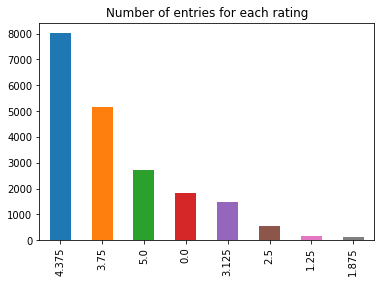

In [7]:
ratings.plot(kind ="bar", title = "Number of entries for each rating")

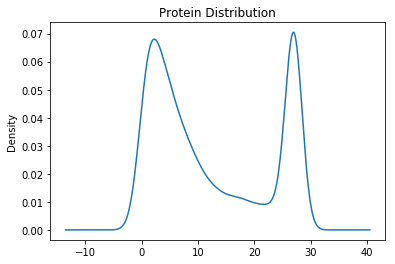

In [8]:
protein = data["protein"].clip_upper(data["protein"].quantile(.75))
protein.plot(kind = "density", title = "Protein Distribution")

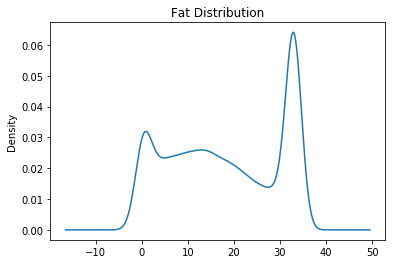

In [9]:
fat = data["fat"].clip_upper(data["fat"].quantile(.75))
fat.plot(kind = "density", title = "Fat Distribution")

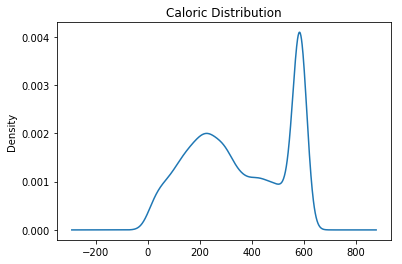

In [10]:
calories = data["calories"].clip_upper(data["calories"].quantile(.75))
calories.plot(kind = "density", title = "Caloric Distribution")

In [12]:
food_data = data.as_matrix()
binary_values = food_data[:,6:] # everything here is a binary feature

In [13]:
def tokenize(text):
	"""Returns a list of words that make up the text.

    Note: for simplicity, lowercase everything.
    Requirement: Use Regex to satisfy this function

    Params: {text: String}
    Returns: Array
    """

	tokenized_text = text.lower()
	tokenized_text = re.findall(r'[a-z0-9]+',
								tokenized_text)  # splits string with delimiter being everything except alphabetical letters
	return tokenized_text

In [16]:
title_to_index = {d[0]: i for i,d in enumerate(food_data)}
index_to_title = {i: d[0] for i,d in enumerate(food_data)}

# create set of tokens: these include binary features / recipe title names 
binary_name_to_index = {}
tokens = set()

for i,name in enumerate(list(data)[6:]):
    token_list = tokenize(name)
    for t in token_list: 
        tokens.add(t)
        if t in binary_name_to_index:   
            binary_name_to_index[t].append(i)
        else:
            binary_name_to_index[t] = [i]

binary_index_to_name = {}
for k,v in binary_name_to_index.items():
    for i in v:
        binary_index_to_name[i] = k

for title in food_data[:,0]:
    token_list = tokenize(title)
    for t in token_list: tokens.add(t)

In [62]:
inverted_index = {t: [] for t in tokens}

for i,row in enumerate(food_data):
    title = row[0]
    token_list = tokenize(title)
    
    token_set = set() # all tokens for this recipe
    for t in token_list:
        token_set.add(t)
    for index,binary in enumerate(row[6:]):
        if binary:
            t = binary_index_to_name[index]
            token_set.add(t)
            
    for t in token_set:
        inverted_index[t].append((i,1))


In [63]:
print(inverted_index["bean"])

[(0, 1), (28, 1), (46, 1), (92, 1), (138, 1), (169, 1), (178, 1), (193, 1), (201, 1), (227, 1), (279, 1), (282, 1), (332, 1), (356, 1), (416, 1), (451, 1), (457, 1), (472, 1), (488, 1), (531, 1), (555, 1), (565, 1), (580, 1), (613, 1), (658, 1), (706, 1), (715, 1), (725, 1), (740, 1), (916, 1), (995, 1), (1004, 1), (1017, 1), (1038, 1), (1061, 1), (1070, 1), (1073, 1), (1107, 1), (1131, 1), (1146, 1), (1173, 1), (1199, 1), (1314, 1), (1340, 1), (1359, 1), (1363, 1), (1367, 1), (1377, 1), (1405, 1), (1409, 1), (1427, 1), (1458, 1), (1564, 1), (1585, 1), (1596, 1), (1626, 1), (1673, 1), (1695, 1), (1735, 1), (1741, 1), (1770, 1), (1796, 1), (1810, 1), (1812, 1), (1826, 1), (1831, 1), (1873, 1), (1911, 1), (1924, 1), (1943, 1), (1982, 1), (2003, 1), (2031, 1), (2035, 1), (2052, 1), (2060, 1), (2172, 1), (2188, 1), (2225, 1), (2329, 1), (2402, 1), (2450, 1), (2475, 1), (2482, 1), (2541, 1), (2542, 1), (2557, 1), (2581, 1), (2598, 1), (2624, 1), (2656, 1), (2667, 1), (2764, 1), (2769, 1), (

In [64]:
def compute_idf(inv_idx, n_docs, min_df=10, max_df_ratio=0.95):

    IDF_dict = dict()
    for word in inv_idx:
        DF_word = len(inv_idx[word])

        if DF_word >= min_df and DF_word / n_docs <= max_df_ratio:
            IDF_dict[word] = math.log(n_docs / (1 + DF_word))

    return IDF_dict

In [52]:
idf = compute_idf(inverted_index, len(food_data))
print(len(idf))

1202


In [53]:
def compute_doc_norms(index, idf, n_docs):

    doc_norms = np.zeros(n_docs)
    for word in index:
        for doc_id in index[word]:
            if word in idf:
                doc_norms[doc_id] += idf[word] ** 2

    doc_norms1 = np.sqrt(doc_norms)
    return doc_norms1

In [54]:
doc_norms = compute_doc_norms(inverted_index, idf, len(food_data))

In [60]:
def index_search_cosine_sim(query):#index idf doc_norms
    query = tokenize(query.lower())
    score_query_doc = dict()
    query_norm = 0
    for word in query:
        if word in idf:
            query_norm += idf[word] ** 2
            for doc in inverted_index[word]:
                if doc not in score_query_doc:
                    score_query_doc[doc] = idf[word] * idf[word]
                else:
                    score_query_doc[doc] += idf[word] * idf[word]

    query_norm = np.sqrt(query_norm)
    for doc in score_query_doc:
        score_query_doc[doc] = score_query_doc[doc] / (query_norm * doc_norms[int(doc)])

    sorted_by_second = sorted(list(score_query_doc.items()), key=lambda tup: tup[1], reverse=True)
    final = [(v, index_to_title[int(k)]) for k, v in sorted_by_second]
    return final[:10]

In [61]:
index_search_cosine_sim("almond")

[(0.5860702742636441, 'Sunshine Cake '),
 (0.5410879523226446, 'Cherry Clafoutis '),
 (0.5362757886670612, 'Almond Sablé Dough '),
 (0.5362757886670612, 'Almond Sablé Dough '),
 (0.5135904169346146, 'Danish Pastry Braid '),
 (0.4754615688960536, 'Lemon Almond Spongecake '),
 (0.4754615688960536, 'Lemon Almond Spongecake '),
 (0.4725697148373379, 'Almond Horchata '),
 (0.46676580611661206, 'Zingy Red Sauce '),
 (0.46078899817847246, 'Anchoiade ')]